<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/swarms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimalizace s využítím swarmů
Swarm - hejno se skládá s jedinců. Tito se pohybují prostorem a snaží se najít "nejlepší místo" o svém úspěchu dávají vědět dalším členům hejna - jedincům, kteří se rozhodují, zda a jak tuto informaci akceptují, speciálně s ohledem na skutečnost, že sami dosahují dílčích úspěchů v hledání.

[Wikipedie](https://cs.wikipedia.org/wiki/Optimalizace_hejnem_%C4%8D%C3%A1stic)

Pohyb členů hejna lze popsat rovnicemi

$x_{i}(t+1) = x_{i}(t) + v_{i}(t+1)$

a

$v_{i}(t + 1) = w * v_{i}(t) + c_{1}[y_{i}(t) − x_{i}(t)]
                   + c_{2}[\hat{y}(t) − x_{i}(t)]$

První rovnice popisuje změnu polohy, zatímco druhá změnu rychlosti pohybu jedince. Rovnice mají tři volitelné parametry

$w$ určuje míru odporu prostředí, snižuje rychlost pohybujícího se jedince obecně a zajišťuje tak stabilitu systému při řešení.

$c_{1}$ a $c_{2}$ jsou parametry určující kognitivní a společenské chování, tedy do jaké míry upřednostňuje jedinec své lokální optimum $y_{i}(t)$ před optimem $\hat{y}(t)$ , kterého dosáhlo celé hejno.

Kriteriální funkce

$z=f(x)$

je aplikovaná při každé iteraci na jedince s polohou $x_{i}(t)$, získané hodnoty jsou porovnávány s osobním optimem $f(y_{i}(t))$. Pokud nová hodnota je 
lepší, je $y_{i}(t)$ nastavena na $x_{i}(t)$, v opačném případě je ponechána původní hodnota. Poloha optima celého hejna $\hat{y}(t)$ je v každé iteraci počítána obdobně, tzn. vybere se poloha nejlepšího z osobních poloh.


In [84]:
!pip install pyswarms

In [0]:
import matplotlib.pyplot as plt
import numpy as np

import pyswarms as ps
from pyswarms.utils.functions.single_obj import sphere
from pyswarms.utils.plotters import plot_cost_history, plot_contour
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters.formatters import Mesher, Designer

## Funkce pro zobrazení stavu částic
Není třeba studovat

In [0]:
def printHistory(func, xrange, yrange, pos_history, index, label):
  #print(pos_history)
  x = []
  y = []
  z = []
  for item in pos_history[index]:
    cx = item[0]
    cy = item[1]
    x.append(cx)
    y.append(cy)
    cz = fx.sphere(np.array([[cx, cy]]))[0]
    z.append(cz)

  xa = []
  ya = []
  za = []     
  xrange_ = list(xrange)
  yrange_ = list(yrange)
  for i in xrange_:
    rowx = []
    rowy = []
    rowz = []
    for j in yrange_:
      rowx.append(i)
      rowy.append(j)
      rowz.append(func(np.array([[i, j]]))[0])
    xa.append(rowx)
    ya.append(rowy)
    za.append(rowz)
  fig, ax = plt.subplots()
  CS = ax.contour(xa, ya, za)
  ax.clabel(CS, CS.levels, inline=True, fmt='%r', fontsize=10)
  ax.plot(x, y, 'ko', ms = 3)
  plt.grid(which='both')
  plt.title(label)
  plt.show()

## Kriteriální funkce
Kriteriální funkce pro použití s knihovnou vyžaduje speciální tvar. V následujícím kódu je definována funkce
```python
def F(f):
```
která umožňuje převést funkci v "běžném tvaru" na funkci v požadovaném tvaru.
Příkladem je v tomto případě funkce
```python
def sphere(x, y):
  return x * x + y * y
```


In [0]:
def sphere(x, y):
  return x * x + y * y

def F(f):
  def func(x):
    vector = []
    for item in x:
      vector.append(f(x[0][0], x[0][1]))
    return vector
  return func

cFunc = F(sphere) 
#cFunc = fx.sphere 

## Výpočet 
Výpočet a zobrazení výsledků.

2020-03-27 17:51:04,317 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}




pyswarms.single.global_best:   0%|          |0/100



pyswarms.single.global_best:   0%|          |0/100, best_cost=0.796



pyswarms.single.global_best:   0%|          |0/100, best_cost=0.796



pyswarms.single.global_best:   0%|          |0/100, best_cost=0.796



pyswarms.single.global_best:   0%|          |0/100, best_cost=0.796



pyswarms.single.global_best:   0%|          |0/100, best_cost=0.796



pyswarms.single.global_best:   0%|          |0/100, best_cost=0.787



pyswarms.single.global_best:   0%|          |0/100, best_cost=0.506



pyswarms.single.global_best:   0%|          |0/100, best_cost=0.472



pyswarms.single.global_best:   0%|          |0/100, best_cost=0.472



pyswarms.single.global_best:   0%|          |0/100, best_cost=0.472



pyswarms.single.global_best:   0%|          |0/100, best_cost=0.472



pyswarms.single.global_best:   0%|   

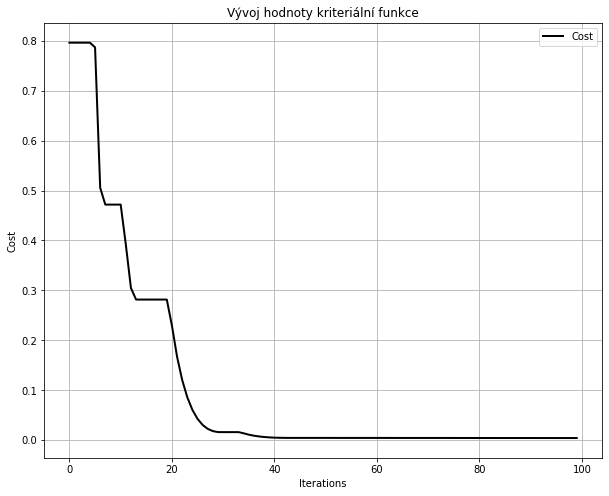

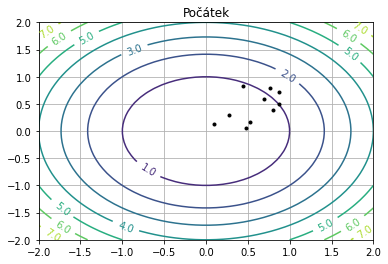

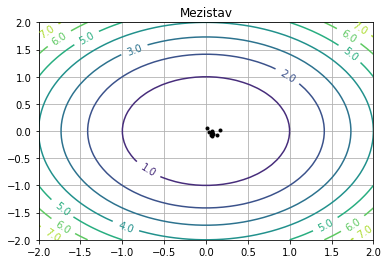

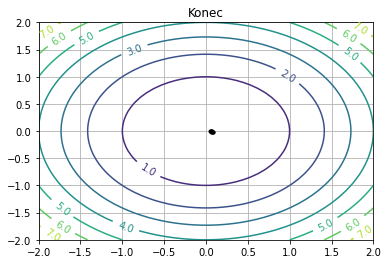

In [98]:
# Set up optimizer
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles = 10, 
  dimensions = 2, options = options)

# Perform optimization
stats = optimizer.optimize(cFunc, iters = 100)

# Obtain cost history from optimizer instance
cost_history = optimizer.cost_history

plot_cost_history(cost_history, title = 'Vývoj hodnoty kriteriální funkce')
plt.grid(which = 'both')
plt.show()

xrange = np.linspace(-2, 2)
yrange = np.linspace(-2, 2)
printHistory(cFunc, xrange, yrange, optimizer.pos_history, 0, "Počátek")
printHistory(cFunc, xrange, yrange, optimizer.pos_history, 50, "Mezistav")
printHistory(cFunc, xrange, yrange, optimizer.pos_history, 99, "Konec")


## Jiná kriteriální funkce
Pokud se optimalizuje složitější kriteriální funkce, nemusí být výsledek optimální. Může se stát, že jedinci uvíznou v lokálním optimu. Vyzkoušejte spustit následující výpočet opakovaně a sledujte jednotlivé výsledky.

In [0]:
from math import sin
def schaffer(x, y):
  result = 0.5 + (
        (sin(x * x - y * y) ** 2.0 - 0.5)
        / ((1 + 0.001 * (x * x + y * y)) ** 2.0)
    )
  return result

cFunc2 = F(schaffer)  

2020-03-27 17:47:07,651 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}




pyswarms.single.global_best:   0%|          |0/200



pyswarms.single.global_best:   0%|          |0/200, best_cost=0.00585



pyswarms.single.global_best:   0%|          |0/200, best_cost=0.00585



pyswarms.single.global_best:   0%|          |0/200, best_cost=0.00585



pyswarms.single.global_best:   0%|          |0/200, best_cost=0.00585



pyswarms.single.global_best:   0%|          |0/200, best_cost=0.00585



pyswarms.single.global_best:   0%|          |0/200, best_cost=0.00585



pyswarms.single.global_best:   0%|          |0/200, best_cost=8.79e-5



pyswarms.single.global_best:   0%|          |0/200, best_cost=8.79e-5



pyswarms.single.global_best:   0%|          |0/200, best_cost=8.79e-5



pyswarms.single.global_best:   0%|          |0/200, best_cost=8.79e-5



pyswarms.single.global_best:   0%|          |0/200, best_cost=8.79e-5



pyswarms.single

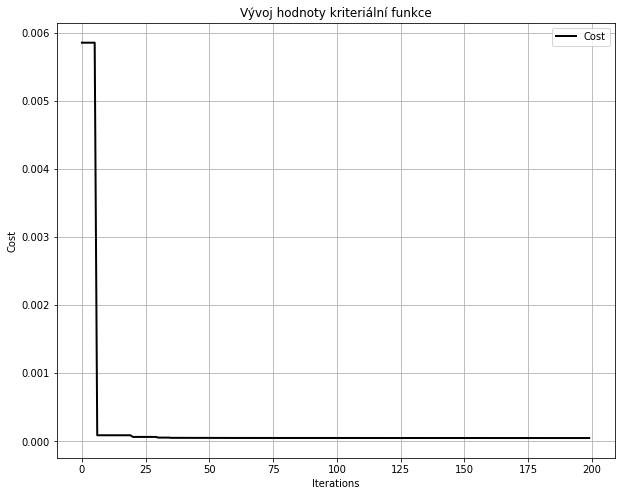

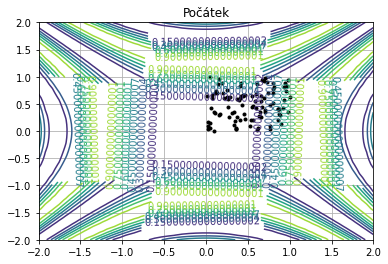

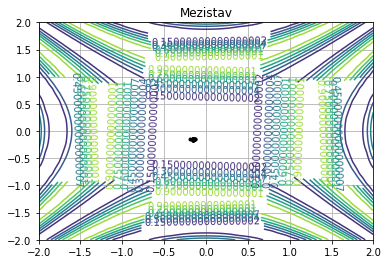

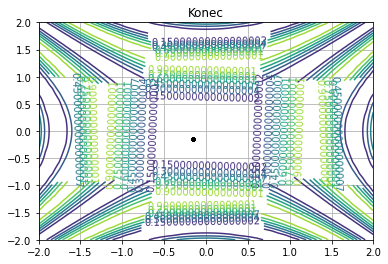

In [96]:
# Set up optimizer
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles = 100, 
  dimensions = 2, options = options)

iters = 200
# Perform optimization
cost, pos = optimizer.optimize(cFunc2, iters = iters)

# Obtain cost history from optimizer instance
cost_history = optimizer.cost_history

plot_cost_history(cost_history, title = 'Vývoj hodnoty kriteriální funkce')
plt.grid(which = 'both')
plt.show()

xrange = np.linspace(-2, 2)
yrange = np.linspace(-2, 2)
printHistory(cFunc2, xrange, yrange, optimizer.pos_history, 0, "Počátek")
printHistory(cFunc2, xrange, yrange, optimizer.pos_history, iters // 2, "Mezistav")
printHistory(cFunc2, xrange, yrange, optimizer.pos_history, iters - 1, "Konec")